[ 0.25+0.j -0.25+0.j  0.25+0.j -0.25+0.j -0.25+0.j  0.25+0.j -0.25+0.j
  0.25+0.j -0.25+0.j  0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j -0.25+0.j
  0.25+0.j -0.25+0.j]
Chaîne binaire trouvée : 000


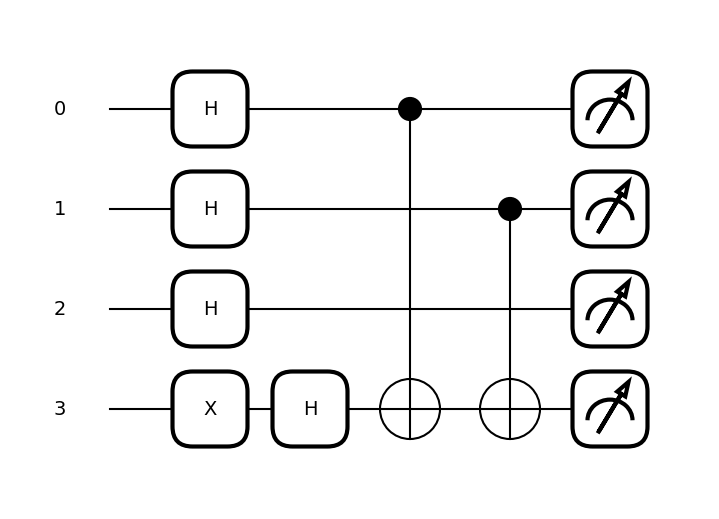

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Définir la chaîne binaire cachée s (par exemple, s = '110')
s = '110'


n_qubits = len(s)  # Nombre de qubits pour l'entrée
dev = qml.device('default.qubit', wires=n_qubits + 1)

@qml.qnode(dev)
def bernstein_vazirani(s):
    # Étapes 1-2: Initialisation et superposition
    for i in range(n_qubits):
        qml.Hadamard(wires=i)

    qml.PauliX(wires=n_qubits)
    qml.Hadamard(wires=n_qubits)

    # Étape 3 : Application de l'oracle pour la chaîne binaire s
    for i in range(n_qubits):
        if s[i] == '1':
            qml.CNOT(wires=[i, n_qubits])

    #return qml.state() si je veux voir l'application del'oracle sur l'état |x>
    
    # Étape 4 : Transformation Hadamard
    for i in range(n_qubits):
        qml.Hadamard(wires=i)
    
    # Étape 5 : Mesure des qubits d'entrée
    return qml.probs(wires=range(n_qubits))
    

# Exécuter le circuit avec la chaîne binaire s
probs = bernstein_vazirani(s)
print(probs)

#∣000⟩, ∣001⟩, ∣010⟩, ∣011⟩, ∣100⟩, ∣101⟩, ∣110⟩, ∣111⟩

result = np.argmax(probs)

binary_result = f"{result:0{n_qubits}b}"  # Convertir en chaîne binaire

print(f"Chaîne binaire trouvée : {binary_result}")

# Dessiner le circuit avec Matplotlib
fig, ax = qml.draw_mpl(bernstein_vazirani)(s)
plt.show()

